In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
fpath = os.path.expanduser("~/dropbox/ecgnet-as/data/edw/edw-echo.csv")
df = pd.read_csv(fpath)

In [4]:
df

,MRN,PatientID,PatientEncounterID,ProcedureID,ProcedureDSC,OrderProcedureID,OrderDTS,StartDTS,EndDTS,ResultDTS,...,AV Area,AV Mean Gradient,AV Peak Gradient,AV Peak Velocity,Indexed AV Area,AV Area units,AV Mean Gradient units,AV Peak Gradient units,AV Peak Velocity units,Indexed AV Area units
0,74,Z6353877,3.290349e+09,173063.0,ADULT ECHO TTE,637997928.0,2020-01-18 01:57:00.0000000,2020-01-18 01:57:00.0000000,2020-01-18 23:59:00.0000000,2020-01-21 13:30:00.0000000,...,1.000000,20.0,34.00,290.0,0.63,cm2,mmHg,mmHg,cm/s,cm2/m2
1,210,Z6555514,3.195991e+09,173063.0,ADULT ECHO TTE,311186750.0,2018-04-13 13:31:00.0000000,2018-04-13 13:31:00.0000000,2018-04-13 23:59:00.0000000,2018-04-13 16:18:00.0000000,...,2.650000,4.0,9.00,NaN,1.26,cm2,mmHg,mmHg,NaN,cm2/m2
2,870,Z6700496,3.209749e+09,173063.0,ADULT ECHO TTE,438397005.0,2018-08-22 12:53:00.0000000,2018-08-22 12:53:00.0000000,2018-08-22 23:59:00.0000000,2018-08-23 11:29:00.0000000,...,1.230000,12.0,25.00,269.0,0.77,cm2,mmHg,mmHg,cm/s,cm2/m2
3,2607,Z12173668,3.274136e+09,173063.0,ADULT ECHO TTE,596294748.0,2019-10-15 11:20:00.0000000,2019-10-15 11:21:00.0000000,2019-10-15 23:59:00.0000000,2019-10-15 13:56:00.0000000,...,NaN,9.0,19.00,NaN,NaN,NaN,mmHg,mmHg,NaN,NaN
4,2653,Z7221166,3.185859e+09,173063.0,ADULT ECHO TTE,367830645.0,2018-01-13 20:01:00.0000000,2018-01-13 20:01:00.0000000,2018-01-13 23:59:00.0000000,2018-01-15 10:54:00.0000000,...,1.300000,30.0,50.00,354.0,0.62,cm2,mmHg,mmHg,cm/s,cm2/m2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59295,7162376,Z17334310,3.333971e+09,173063.0,ADULT ECHO TTE,741943184.0,2020-11-02 12:21:00.0000000,2020-11-02 12:21:00.0000000,2020-11-02 23:59:00.0000000,2020-11-02 16:22:00.0000000,...,1.927018,5.0,8.18,143.0,0.92,cm2,mmHg,mmHg,cm/s,cm2/m2
59296,7163070,Z17106104,3.332103e+09,173063.0,ADULT ECHO TTE,738345774.0,2020-10-18 20:33:00.0000000,2020-10-18 20:34:00.0000000,2020-10-18 23:59:00.0000000,2020-10-20 13:03:00.0000000,...,3.004045,2.0,4.24,103.0,1.24,cm2,mmHg,mmHg,cm/s,cm2/m2
59297,7163703,Z11057472,3.282844e+09,173063.0,ADULT ECHO TTE,617747100.0,2019-11-30 20:29:00.0000000,2019-12-01 08:00:00.0000000,2019-12-01 23:59:00.0000000,2019-12-03 14:10:00.0000000,...,1.750000,10.0,18.00,220.2,0.92,cm2,mmHg,mmHg,cm/s,cm2/m2
59298,7167647,Z17218866,3.319225e+09,173063.0,ADULT ECHO TTE,706487703.0,2020-09-08 07:31:00.0000000,2020-09-08 07:31:00.0000000,2020-09-08 23:59:00.0000000,2020-09-08 10:40:00.0000000,...,0.613420,20.0,NaN,324.0,0.28,cm2,mmHg,NaN,cm/s,cm2/m2


In [40]:
df['AV Peak Velocity units'].value_counts()

cm/s    26869
mm/s     7085
Name: AV Peak Velocity units, dtype: int64

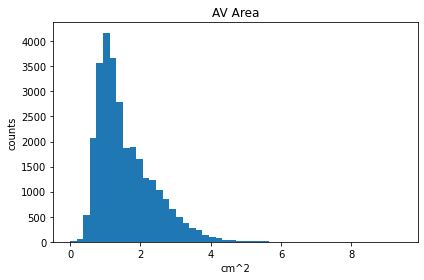

In [28]:
fig, ax = plt.subplots()

key = "AV Area"

ax.hist(df[df[key]<10][key], 50)
ax.set_xlabel('cm^2')
ax.set_ylabel('counts')
ax.set_title(key)

fig.tight_layout()
plt.show()

In [29]:
df[df[key]<10][key].mean()

1.591537864018099

In [31]:
df[df[key]<10][key].median()

1.38

/usr/local/lib/python3.8/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.8/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


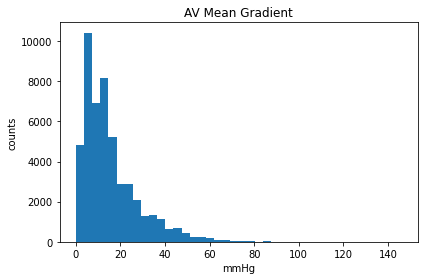

In [44]:
fig, ax = plt.subplots()

key = 'AV Mean Gradient'

ax.hist(df[key], 40)
ax.set_xlabel('mmHg')
ax.set_ylabel('counts')
ax.set_title(key)

fig.tight_layout()
plt.show()

In [45]:
sum(df[key] > 40)

2864

In [46]:
df.shape

(59300, 25)

In [48]:
sum(df[key] > 40) / df.shape[0] * 100

4.829679595278246

/usr/local/lib/python3.8/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.8/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


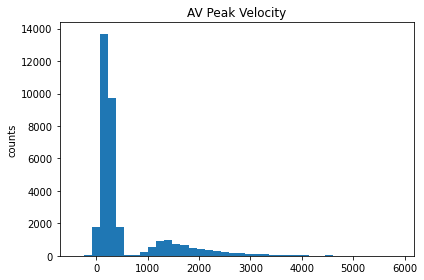

In [38]:
fig, ax = plt.subplots()

key = 'AV Peak Velocity'

ax.hist(df[key], 40)
ax.set_xlabel('')
ax.set_ylabel('counts')
ax.set_title(key)

fig.tight_layout()
plt.show()